In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data Cleaning

In [8]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
data['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object>

In [11]:
data['rating'].fillna('TV-MA',inplace=True)

In [12]:
data['director'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object>

In [13]:
data['director'].fillna('Unknown',inplace=True)

In [14]:
data['cast'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object>

In [15]:
data['cast'].fillna('Unknown',inplace=True)

In [16]:
data['country'].value_counts

<bound method IndexOpsMixin.value_counts of 0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object>

In [17]:
data['country'].fillna(data['country'].mode()[0], inplace=True)

In [18]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [19]:
data.dropna(subset=['date_added'],inplace=True)

In [20]:
data.dropna(subset=['duration'],inplace=True)

In [21]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

All the missing values are cleared

In [22]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [23]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [24]:
data['month'] = pd.to_numeric(data['date_added'].dt.month, errors='coerce').astype("Int64")

In [25]:
data['year'] = pd.to_numeric(data['date_added'].dt.year, errors='coerce').astype("Int64")

In [26]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [27]:
data = data.rename(columns= {'listed_in' : 'genre'})

In [28]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [29]:
data['genre'] = data['genre'].apply(lambda x : x.split(",")[0])

In [30]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,9,2021


# EDA

Which year has the maximum number of released TV shows and movies?

In [31]:
tv_shows = data[data['type']=='TV Show']
movies = data[data['type']=='Movie']

Text(0, 0.5, 'Count')

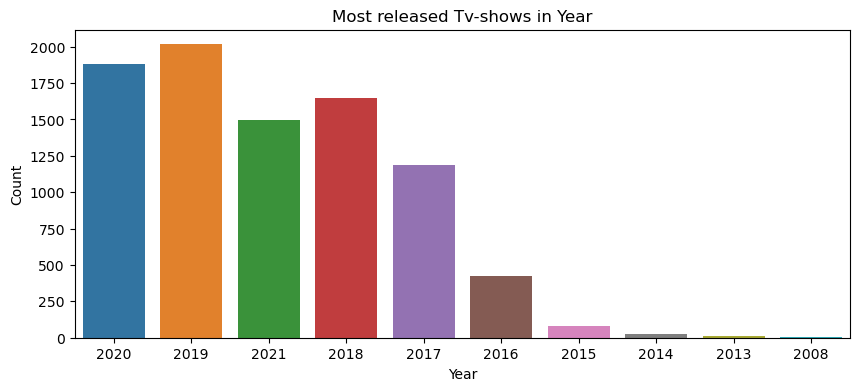

In [32]:
tv_shows['year'].value_counts
plt.figure(figsize=(10,4))

sns.countplot(x = 'year', data = data, order = tv_shows['year'].value_counts().index)
plt.title("Most released Tv-shows in Year")
plt.xlabel('Year')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

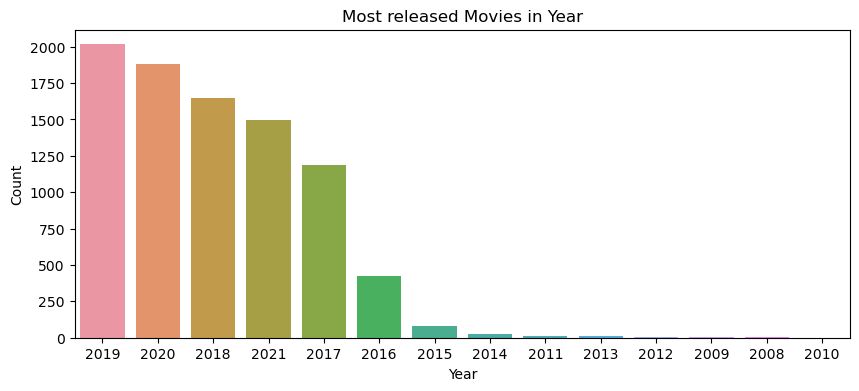

In [33]:
movies['year'].value_counts
plt.figure(figsize=(10,4))

sns.countplot(x = 'year', data = data, order = movies['year'].value_counts().index)
plt.title("Most released Movies in Year")
plt.xlabel('Year')
plt.ylabel('Count')

What is the distribution of content types (TV shows and movies) in the dataset?

In [34]:
data['type'].value_counts()

Movie      6128
TV Show    2666
Name: type, dtype: int64

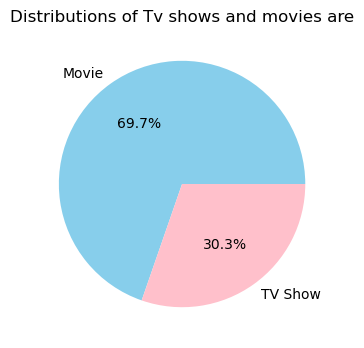

In [35]:
types = data['type'].value_counts()
plt.figure(figsize=(6,4))

plt.pie(types.values, labels=data['type'].value_counts().index, autopct= '%1.1f%%', colors = ['skyblue','pink'])
plt.title("Distributions of Tv shows and movies are")
plt.show()


Which countries have the highest number of content releases Tv-shows and Movies?

Text(0, 0.5, 'count')

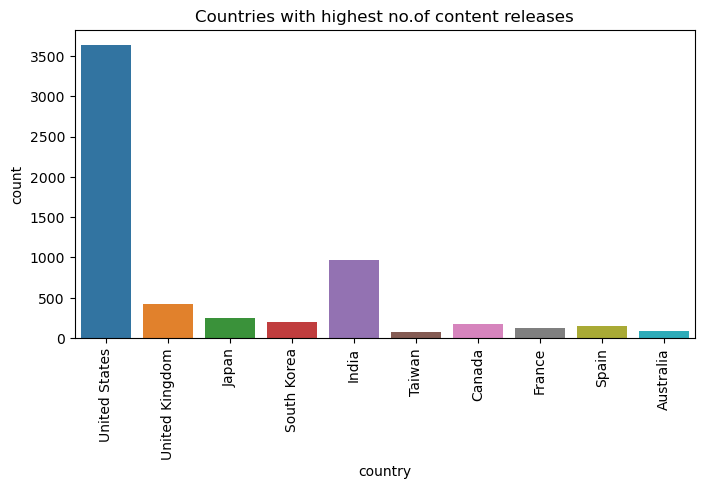

In [36]:
tv_shows['country'].value_counts()
plt.figure(figsize=(8,4))

sns.countplot(x='country', data=data, order=tv_shows['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Countries with highest no.of content releases")
plt.xlabel("country")
plt.ylabel("count")

Text(0, 0.5, 'count')

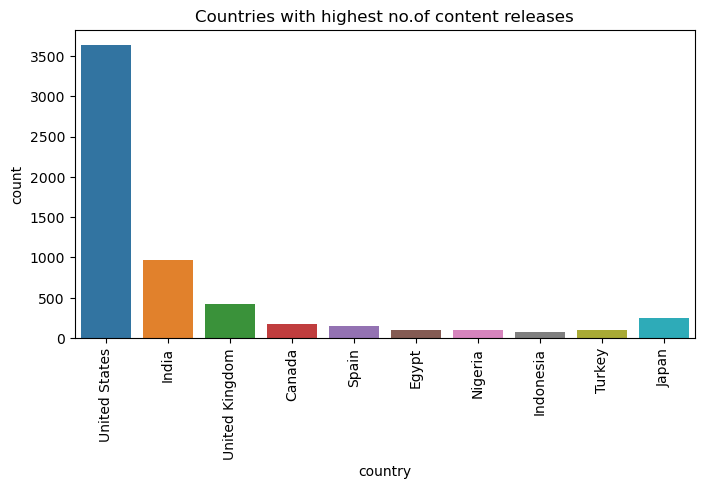

In [37]:
movies['country'].value_counts()
plt.figure(figsize=(8,4))

sns.countplot(x='country', data=data, order=movies['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Countries with highest no.of content releases")
plt.xlabel("country")
plt.ylabel("count")

Countries with highest no.of content releases on Tv-shows and movies are United States.

What are the most common content ratings in the dataset?

Text(0, 0.5, 'count')

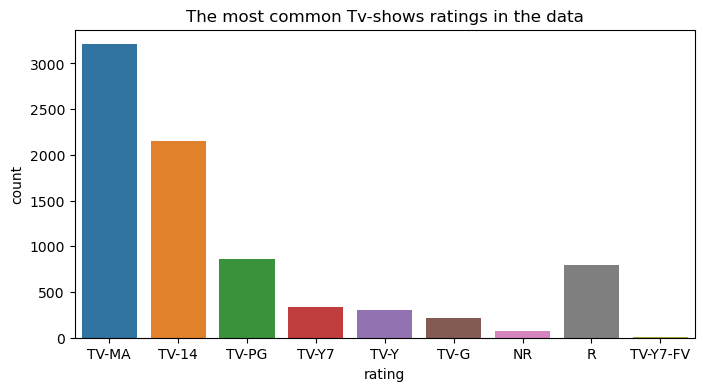

In [38]:
tv_shows['rating'].value_counts()
plt.figure(figsize=(8,4))

sns.countplot(x='rating' , data=data, order=tv_shows['rating'].value_counts().index)
plt.title("The most common Tv-shows ratings in the data")
plt.xlabel("rating")
plt.ylabel("count")

Text(0, 0.5, 'count')

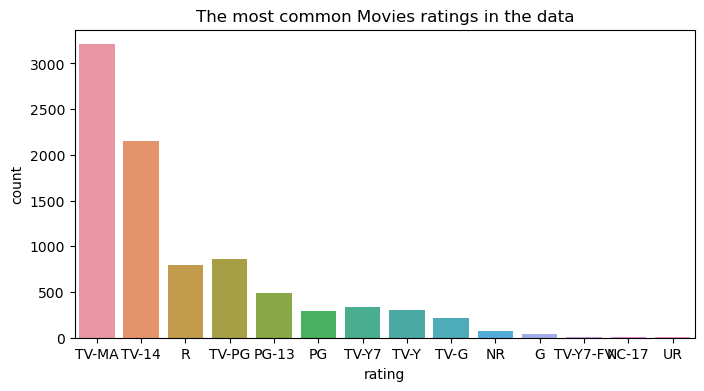

In [39]:
movies['rating'].value_counts()
plt.figure(figsize=(8,4))

sns.countplot(x='rating',data=data, order=movies['rating'].value_counts().index)
plt.title("The most common Movies ratings in the data")
plt.xlabel("rating")
plt.ylabel("count")

Which genres are the most popular in terms of content type [Tv-show and Movies] count?

Text(0, 0.5, 'count')

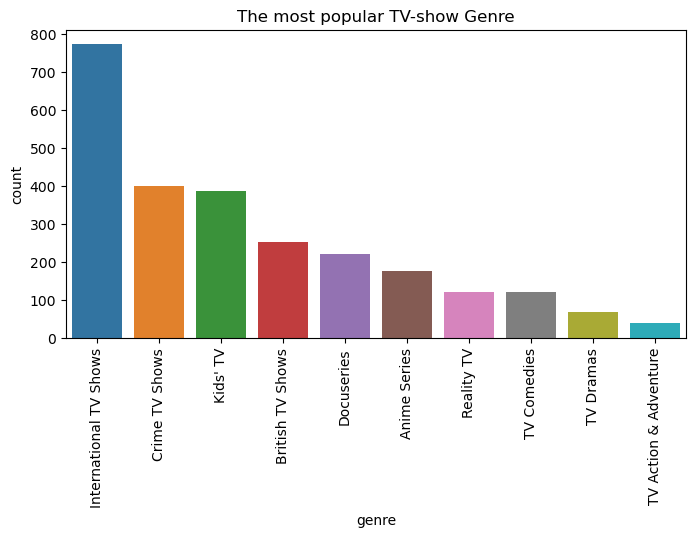

In [40]:
tv_shows['genre'].value_counts()
plt.figure(figsize=(8,4))

sns.countplot(x='genre', data = data, order=tv_shows['genre'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("The most popular TV-show Genre")
plt.xlabel("genre")
plt.ylabel("count")

Text(0, 0.5, 'count')

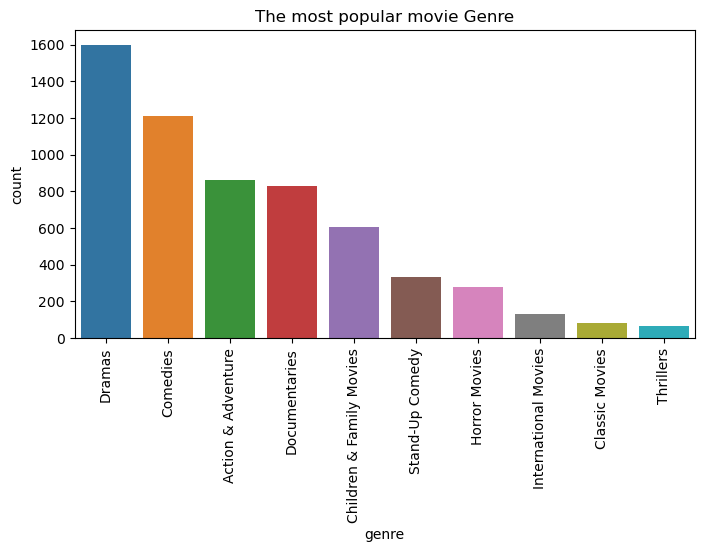

In [41]:
movies['genre'].value_counts()
plt.figure(figsize=(8,4))


sns.countplot(x='genre', data=data, order=movies['genre'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("The most popular movie Genre")
plt.xlabel("genre")
plt.ylabel("count")

Which genre has highest number of counts in the dataset?

Text(0, 0.5, 'count')

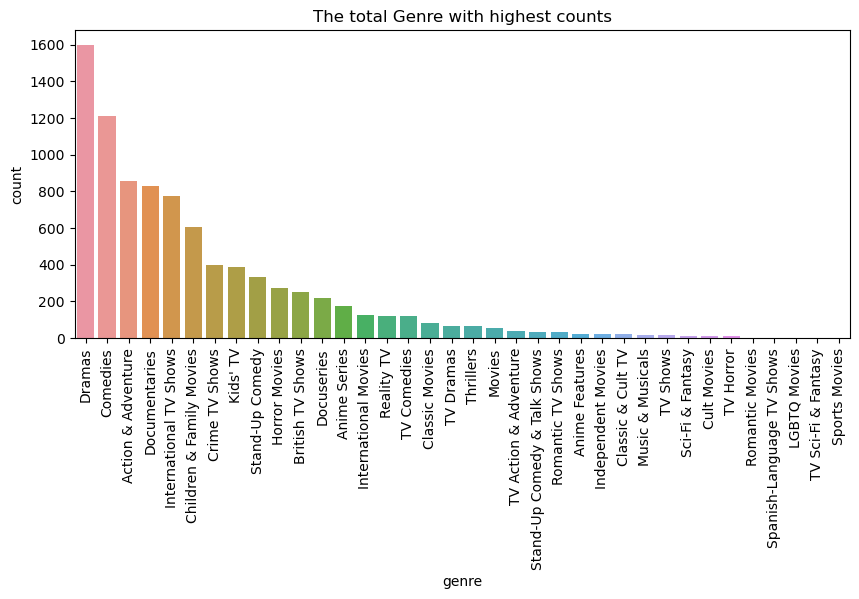

In [43]:
data['genre'].value_counts()
plt.figure(figsize=(10,4))

sns.countplot(x='genre',data=data, order=data['genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title("The total Genre with highest counts")
plt.xlabel("genre")
plt.ylabel("count")

List the top 10 directors in the Netflix dataset, considering both TV shows and movies.

Text(0, 0.5, 'count')

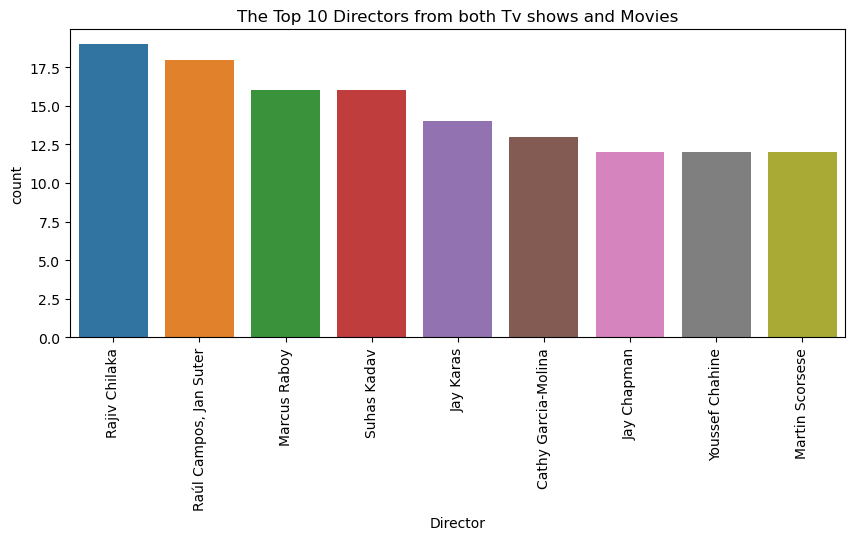

In [45]:
data['director'].value_counts()
plt.figure(figsize=(10,4))


sns.countplot(x='director', data=data, order= data['director'].value_counts().iloc[1:10].index)
plt.xticks(rotation=90)
plt.title("The Top 10 Directors from both Tv shows and Movies")
plt.xlabel("Director")
plt.ylabel("count")

How has the distribution of content releases changed over the years?



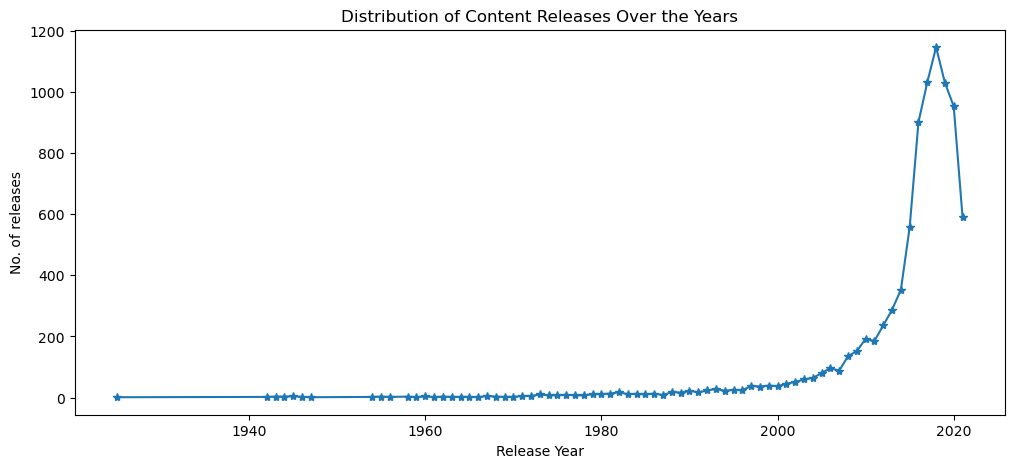

In [46]:
counts = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,5))

plt.plot(counts.index,counts.values,marker='*')
plt.title("Distribution of Content Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("No. of releases")
plt.show()